In [45]:
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.decomposition import SparsePCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
from PIL import Image,ImageEnhance

import os


In [15]:
def identity(root_path):
    img = Image.open(root_path)
    return img

def flip(root_path):
    img = Image.open(root_path)
    flip_img = img.transpose(Image.FLIP_LEFT_RIGHT)
    return flip_img

def rotation(root_path):
    img = Image.open(root_path)
    rotation_img = img.rotate(20)
    return rotation_img

def brightnessEnhancement(root_path):
    image = Image.open(root_path)
    enh_bri = ImageEnhance.Brightness(image)
    brightness = 1.5
    image_brightened = enh_bri.enhance(brightness)
    return image_brightened

def colorEnhancement(root_path):
    image = Image.open(root_path)
    enh_col = ImageEnhance.Color(image)
    color = 1.5
    image_colored = enh_col.enhance(color)
    return image_colored

methods1 = [identity, flip, rotation]
methods2 = [identity, brightnessEnhancement, colorEnhancement]



In [26]:
from PIL import Image
import numpy as np

def image_to_vector(img_input):
    returanVec = np.zeros(400)

    # Check if input is a file path or a PIL Image object
    if isinstance(img_input, str):  # img_input is a file path
        img = Image.open(img_input)
    else:  # img_input is a PIL Image object
        img = img_input

    pixel = np.array(img)

    for i in range(20):
        for j in range(20):
            returanVec[20*i + j] = pixel[i][j]  # Assuming grayscale and 20x20

    return returanVec


In [27]:
def load_data(dataset_path, enhencement=False):
    image_list = []
    label_list = []

    labels_path_list = os.listdir(dataset_path)
    labels_path_list.pop(0)

    for i in range(len(labels_path_list)):
        image_label_path = os.path.join(dataset_path, labels_path_list[i])
        image_path_list = os.listdir(image_label_path)
        for image_path in image_path_list:
            img_path = os.path.join(image_label_path, image_path)
            if enhencement:
                for method in methods2:
                    img = method(img_path)
                    vector = image_to_vector(img)
            else:
                vector = image_to_vector(img_path)
            image_list.append(vector)
            label_list.append(int(labels_path_list[i]))

    image_list = np.array(image_list)
    label_list = np.array(label_list)
    print(f"image vector dimension:{image_list.shape}, label dimension: {label_list.shape}")

    return image_list , label_list



In [24]:
X_train, y_train = load_data(dataset_path=r"D:\点头教育\第三期资料\test1-master-6357471313d7e4d1fe1bf0a4c13b40b3abf7c790\人工智能系统实战第三期\实战代码\机器学习项目实战\K近邻车牌识别\data\train")
X_test, y_test = load_data(dataset_path=r"D:\点头教育\第三期资料\test1-master-6357471313d7e4d1fe1bf0a4c13b40b3abf7c790\人工智能系统实战第三期\实战代码\机器学习项目实战\K近邻车牌识别\data\test")


image vector dimension:(11402, 400), label dimension: (11402,)
image vector dimension:(4665, 400), label dimension: (4665,)


In [28]:
X_train2, y_train2 = load_data(dataset_path=r"D:\点头教育\第三期资料\test1-master-6357471313d7e4d1fe1bf0a4c13b40b3abf7c790\人工智能系统实战第三期\实战代码\机器学习项目实战\K近邻车牌识别\data\train", enhencement=True)
X_test2, y_test2 = load_data(dataset_path=r"D:\点头教育\第三期资料\test1-master-6357471313d7e4d1fe1bf0a4c13b40b3abf7c790\人工智能系统实战第三期\实战代码\机器学习项目实战\K近邻车牌识别\data\test", enhencement=True)


image vector dimension:(11402, 400), label dimension: (11402,)
image vector dimension:(4665, 400), label dimension: (4665,)


In [38]:
# Standardize data
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

std2 = StandardScaler()
X_train_std2 = std2.fit_transform(X_train2)
X_test_std2 = std2.fit_transform(X_test2)


## Hyperparameters for KNN

In [30]:
from sklearn.metrics import accuracy_score

In [36]:
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
            'weights':['uniform','distance'],
            'p':[1,2],
            }
knn=KNeighborsClassifier()
grid_search=GridSearchCV(knn,parameters,scoring='accuracy',cv=5,verbose=100,n_jobs=1)
grid_search.fit(X_train_std, y_train)
label = grid_search.predict(X_test_std)
print(grid_search.best_score_,grid_search.best_params_)

# best model: 0.914487274524339 {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5; 1/40] START n_neighbors=1, p=1, weights=uniform........................
[CV 1/5; 1/40] END n_neighbors=1, p=1, weights=uniform;, score=0.958 total time=   2.8s
[CV 2/5; 1/40] START n_neighbors=1, p=1, weights=uniform........................
[CV 2/5; 1/40] END n_neighbors=1, p=1, weights=uniform;, score=0.940 total time=   2.1s
[CV 3/5; 1/40] START n_neighbors=1, p=1, weights=uniform........................
[CV 3/5; 1/40] END n_neighbors=1, p=1, weights=uniform;, score=0.946 total time=   2.4s
[CV 4/5; 1/40] START n_neighbors=1, p=1, weights=uniform........................
[CV 4/5; 1/40] END n_neighbors=1, p=1, weights=uniform;, score=0.957 total time=   2.5s
[CV 5/5; 1/40] START n_neighbors=1, p=1, weights=uniform........................
[CV 5/5; 1/40] END n_neighbors=1, p=1, weights=uniform;, score=0.956 total time=   2.5s
[CV 1/5; 2/40] START n_neighbors=1, p=1, weights=distance.......................
[CV 1/5; 2/4

In [ ]:
# best model 0.9515878308221233 {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', p=2)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', p=2)
knn.fit(X_train_std2, y_train)
y_pred2 = knn.predict(X_test_std2)
print(f"Accuracy:{accuracy_score(y_pred2, y_pred)}")

In [37]:
def build_model(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Accuracy:{accuracy_score(y_test, y_pred)}")

    return model

In [39]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', p=2)
build_model(knn, X_train_std, X_test_std, y_train, y_test)

Accuracy:0.6617363344051447


KNeighborsClassifier(n_neighbors=1)

In [40]:
# with enhancement methods
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', p=2)
build_model(knn, X_train_std2, X_test_std2, y_train, y_test)

Accuracy:0.6617363344051447


KNeighborsClassifier(n_neighbors=1)

###  SMOTE-Over Sampling

In [10]:
## over sampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train_std2, y_train2)
X_test_smote, y_test_smote = oversample.fit_resample(X_test_std2, y_test2)
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', p=2)
build_model(knn, X_train_smote, X_test_smote, y_train_smote, y_test_smote)

### PCA

In [ ]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.fit_transform(X_test_smote)

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', p=2)
build_model(knn, X_train_pca, X_test_pca, y_train, y_test)


In [50]:
def draw(x,y,name,title,xlabel,ylabel):
    plt.plot(x,y,label=name)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

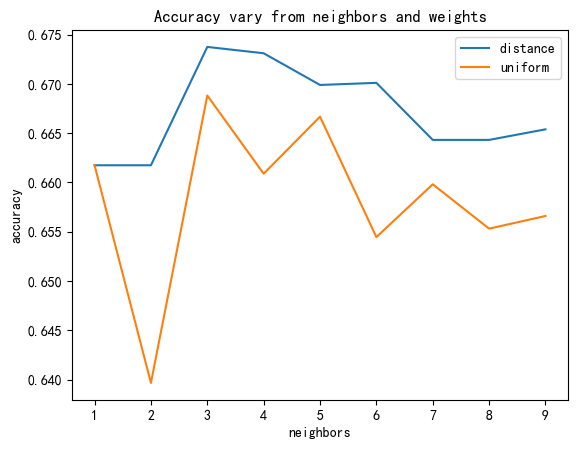

In [52]:
title = "Accuracy vary from neighbors and weights"
xlabel = 'neighbors'
ylabel = 'accuracy'

weights = ['distance', 'uniform']
for w in weights:
    accuracy_list = []
    for neighbors in range(1, 10):
        knn = KNeighborsClassifier(n_neighbors=neighbors, weights=w)
        knn.fit(X_train_std2, y_train2)
        y_pred = knn.predict(X_test_std2)
        accuracy_list.append(accuracy_score(y_test2, y_pred))
    draw(range(1, 10), accuracy_list, w, title, xlabel, ylabel)
plt.show()

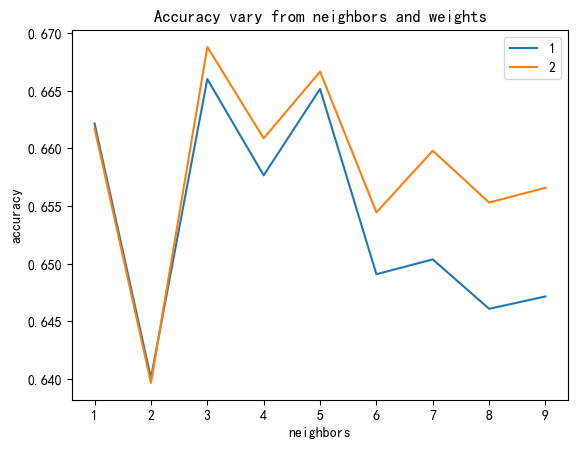

In [54]:
title = "Accuracy vary from neighbors and weights"
xlabel = 'neighbors'
ylabel = 'accuracy'

p_list = [1, 2]
# name_list=['曼哈顿距离','欧式距离','闵可夫斯基距离']
for p in p_list:
    accuracy_list = []
    for neighbors in range(1, 10):
        knn = KNeighborsClassifier(n_neighbors=neighbors, weights='uniform', p=p)
        knn.fit(X_train_std2, y_train2)
        y_pred = knn.predict(X_test_std2)
        accuracy_list.append(accuracy_score(y_test2, y_pred))
    draw(range(1, 10), accuracy_list, p, title, xlabel, ylabel)
plt.show()
